In [4]:
from google.colab import files
upload = files.upload()

Saving scr_dataset.csv to scr_dataset.csv


In [71]:
!pip install keras

In [626]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
from tensorflow import Keras
from tabulate import tabulate
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.Sequential import Sequential
from keras.layers import LSTM, Dense

In [810]:
df = pd.read_csv('scr_dataset.csv')
df.head(15)

,x,y
0,1.0,1.750768
1,1.1,1.699704
2,1.2,1.607502
3,1.3,1.479060
4,1.4,1.320438
5,1.5,1.138615
6,1.6,0.941199
7,1.7,0.736124
8,1.8,0.531327
9,1.9,0.334442


In [811]:
df.set_index('x', inplace = True)
df.head(15)

,y
x,
1.0,1.750768
1.1,1.699704
1.2,1.607502
1.3,1.479060
1.4,1.320438
1.5,1.138615
1.6,0.941199
1.7,0.736124
1.8,0.531327


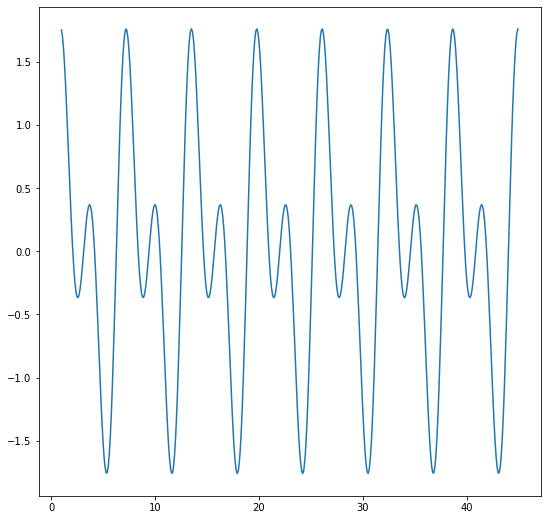

In [812]:
plt.figure(figsize = (9,9))
plt.plot(df)
plt.show()

In [813]:
df.shape

(440, 1)

In [814]:
X = df.values
X.shape
X.reshape((-1,1))[:10]

array([[1.75076841],
       [1.69970376],
       [1.60750227],
       [1.47905956],
       [1.32043788],
       [1.13861499],
       [0.94119946],
       [0.73612371],
       [0.53132719],
       [0.3344422 ]])

In [815]:
train = df[:25];test = df[25:]
train_series = X[:220] ; test_series = X[220:]

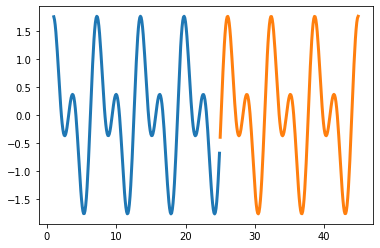

In [816]:
plt.plot(train, lw = 3)
plt.plot(test, lw = 3)

In [979]:
train_generator = TimeseriesGenerator(train_series, train_series,
                                      length        = 40, 
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = 1)

test_generator = TimeseriesGenerator(test_series, test_series,
                                      length        = 40, 
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = 1)

In [980]:
n_neurons  = 5
model = Sequential()
model.add(LSTM(n_neurons, input_shape=(40, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(train_generator,epochs=50, verbose=0)

In [981]:
len(test_generator)

180

In [988]:
test_predictions  = model.predict(test_generator)
test_predictions_df = pd.DataFrame(test_predictions)
test_predictions_df['x'] = np.arange(27,45,0.1)
test_predictions_df.set_index('x', inplace = True)
test_predictions[:15]

array([[ 0.4027524 ],
       [ 0.21374305],
       [ 0.04356671],
       [-0.10214819],
       [-0.21916814],
       [-0.30459633],
       [-0.35681587],
       [-0.37558186],
       [-0.3622082 ],
       [-0.31974766],
       [-0.25302994],
       [-0.16841301],
       [-0.07318685],
       [ 0.02524651],
       [ 0.12011129]], dtype=float32)

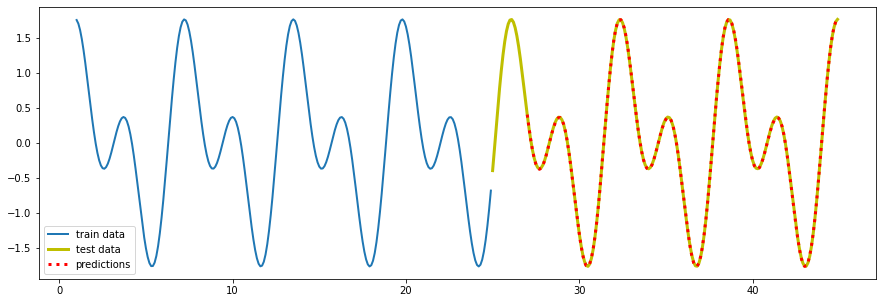

In [989]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(train, lw=2, label='train data')
ax.plot(test, lw=3, c='y', label='test data')
ax.plot(test_predictions_df, lw=3, c='r',linestyle = ':', label='predictions')
ax.legend(loc="lower left")
plt.show()

In [990]:
train_series = train_series.reshape((-1))
test_series = test_series.reshape((-1))
test_predictions = test_predictions.reshape((-1))

In [992]:
lb = 40
pred_list = test_series[-lb:]
pred_list

for i in range(220):
  x = pred_list[-lb:]
  x = x.reshape((1,lb,1))
  out = model.predict(x)[0]
  pred_list = np.append(pred_list, out)
pred_list = pred_list[lb-1:]

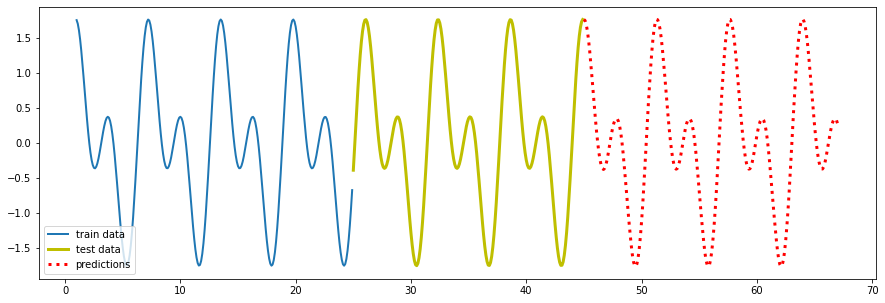

In [993]:
pred_list_df = pd.DataFrame(pred_list)
pred_list_df['x'] = np.arange(45.0,67.1,.1)
pred_list_df.set_index('x', inplace = True)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(train, lw=2, label='train data')
ax.plot(test, lw=3, c='y', label='test data')
ax.plot(pred_list_df, lw=3, c='r',linestyle = ':', label='predictions')
ax.legend(loc="lower left")
plt.show()

In [1004]:
pred_list_df.iloc[[50.0]]

,0
x,
50.0,-1.134409
